In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from heatmap import heatmap, corrplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# %matplotlib inline
# sns.set(color_codes=True, font_scale=1.2)
sns.set(color_codes=True)


In [2]:
df = pd.read_csv('multilang_playlist.csv')
print(df.columns)
print(len(df))
# print(df[df.duplicated(subset=['id'])])
df.drop_duplicates(subset ="id", 
                     keep = False, inplace = True)
print(len(df))

Index(['Unnamed: 0', 'id', 'name', 'popularity', 'uri', 'lang', 'duration_ms',
       'time_signature', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'track_href', 'analysis_url', 'artist'],
      dtype='object')
7322
6896


In [3]:
df.tail()
df.describe()

,Unnamed: 0,popularity,duration_ms,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,6896.000000,6896.00000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000,6896.000000
mean,3642.598463,36.56801,218054.689675,3.991589,0.727061,0.670008,5.408643,-7.034605,0.500435,0.183619,0.240554,0.013484,0.180674,0.537441,116.398779
std,2119.523020,19.13525,51149.621857,0.225146,0.121442,0.144544,3.645344,2.508939,0.500036,0.108843,0.214732,0.086935,0.141439,0.213155,28.859337
min,0.000000,0.00000,120000.000000,1.000000,0.258000,0.129000,0.000000,-22.266000,0.000000,0.025300,0.000017,0.000000,0.009120,0.034100,42.439000
25%,1791.750000,22.00000,183160.000000,4.000000,0.654000,0.570000,2.000000,-8.388250,0.000000,0.078475,0.063300,0.000000,0.095300,0.375000,92.580500
50%,3611.500000,38.00000,210994.500000,4.000000,0.743000,0.674000,6.000000,-6.760500,1.000000,0.174000,0.176500,0.000000,0.122000,0.543000,109.986000
75%,5490.250000,51.00000,245160.000000,4.000000,0.815000,0.778000,9.000000,-5.332750,1.000000,0.278000,0.369000,0.000023,0.221000,0.703250,138.050000
max,7321.000000,89.00000,592588.000000,5.000000,0.976000,0.993000,11.000000,0.402000,1.000000,0.400000,0.938000,0.975000,0.985000,0.976000,230.270000


In [4]:
va = df.var()
va

Unnamed: 0          4.492378e+06
popularity          3.661578e+02
duration_ms         2.616284e+09
time_signature      5.069067e-02
danceability        1.474813e-02
energy              2.089287e-02
key                 1.328853e+01
loudness            6.294777e+00
mode                2.500361e-01
speechiness         1.184688e-02
acousticness        4.610999e-02
instrumentalness    7.557620e-03
liveness            2.000506e-02
valence             4.543500e-02
tempo               8.328613e+02
dtype: float64

In [5]:
from sklearn import preprocessing

In [6]:
numerical_columns = ['danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','time_signature']

num_cols_w_lang = ['lang', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','time_signature']
dfs = df[numerical_columns]
dfl = df[num_cols_w_lang]
corr = dfs.corr()

In [7]:
dfs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.844,0.505,5,-7.949,0,0.1330,0.65800,0.000002,0.1820,0.637,129.919,4
1,0.801,0.665,10,-6.279,1,0.0706,0.27200,0.000000,0.0703,0.609,95.016,4
2,0.802,0.689,0,-6.135,1,0.1550,0.41100,0.000000,0.1530,0.302,135.971,4
3,0.498,0.536,9,-8.711,1,0.0446,0.39700,0.000000,0.1070,0.386,114.036,4
4,0.693,0.625,8,-7.588,0,0.2110,0.08570,0.000007,0.0914,0.399,176.137,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7317,0.895,0.900,7,-8.905,1,0.1950,0.00107,0.000661,0.2390,0.896,131.671,4
7318,0.847,0.828,6,-12.497,1,0.0795,0.13700,0.000002,0.1010,0.451,125.764,4
7319,0.874,0.857,1,-3.443,1,0.0910,0.16700,0.000032,0.3150,0.895,107.168,4
7320,0.573,0.802,1,-9.236,1,0.0464,0.00292,0.603000,0.1880,0.745,161.222,4


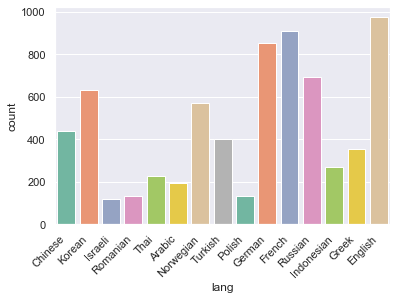

In [8]:
# dfs = preprocessing.normalize(dfs)
# dfs

chart = sns.countplot(x="lang", data=dfl,  palette="Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('song-language-distribution.png')

In [9]:
# plt.figure(figsize=(8, 8))
# corrplot(dfs.corr(), size_scale=500);

In [10]:
# plt.tight_layout()
# f,ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
# plt.autoscale()

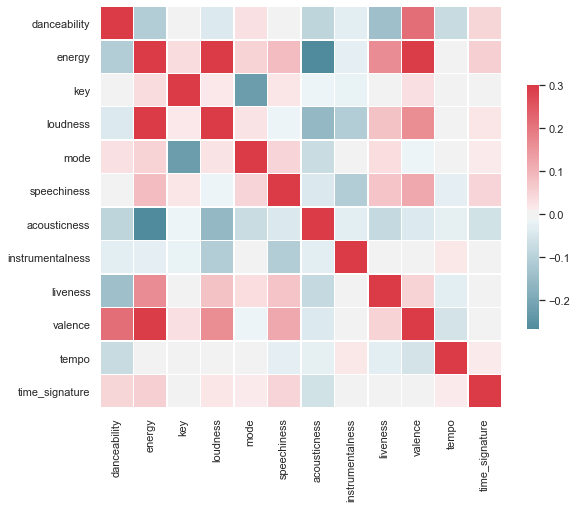

In [11]:

f, ax = plt.subplots(figsize=(9, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
#             mask=mask,
            cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.autoscale()
plt.savefig('corr-heatmap.png')

/Users/chunsingtsui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


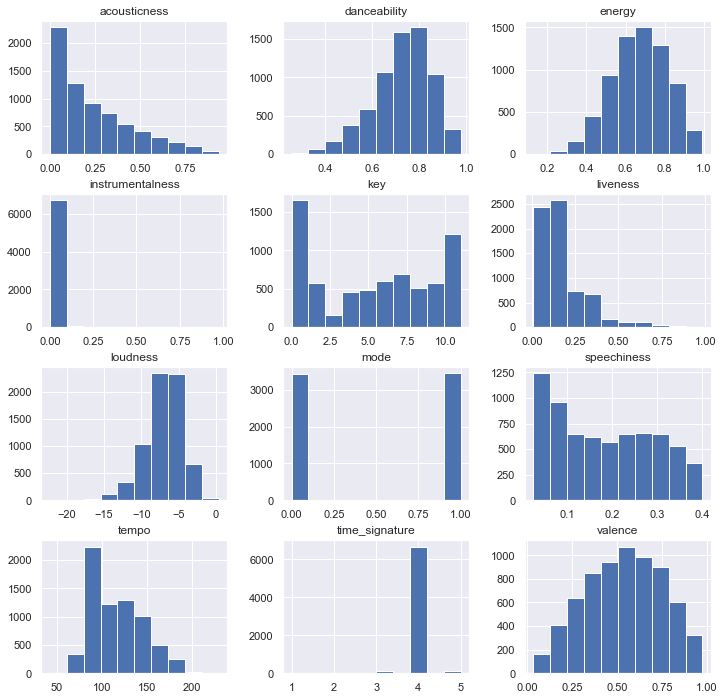

In [12]:
# for c in numerical_columns:    
#     sns.distplot(dfs[c])
#     plt.show()

# c = dfs.hist()


fig = plt.figure(figsize = (12,12))
ax = fig.gca()
dfs.hist(ax = ax)
plt.autoscale()

In [13]:
'''
Looking at the histograms of each audio feature, we see that some fetures are not useful in in determining 
how a song will differ from one another

instrucmentalness
mode
time_signature 
liveness

dropped due to the lack of spread in the data distribution, or it doesn't seem too relevent

'''

cols_final = ['danceability','energy', 'key', 'loudness',  'speechiness', 'acousticness', 'valence', 'tempo']
#, 'liveness'
#'mode',
#,'time_signature'
#'instrumentalness',

df_final = dfs[cols_final]

In [14]:
# g = sns.PairGrid(dfs[cols_final])
# g.map(plt.scatter);

In [15]:
# g = sns.PairGrid(dfs[cols_final])
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter);
# plt.savefig('pair_wise.png')

In [16]:
df_final
# df2 = dfl[dfl['lang']!= 'English']

# g = sns.PairGrid(df2, hue="lang")
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend();
# plt.autoscale()

,danceability,energy,key,loudness,speechiness,acousticness,valence,tempo
0,0.844,0.505,5,-7.949,0.1330,0.65800,0.637,129.919
1,0.801,0.665,10,-6.279,0.0706,0.27200,0.609,95.016
2,0.802,0.689,0,-6.135,0.1550,0.41100,0.302,135.971
3,0.498,0.536,9,-8.711,0.0446,0.39700,0.386,114.036
4,0.693,0.625,8,-7.588,0.2110,0.08570,0.399,176.137
...,...,...,...,...,...,...,...,...
7317,0.895,0.900,7,-8.905,0.1950,0.00107,0.896,131.671
7318,0.847,0.828,6,-12.497,0.0795,0.13700,0.451,125.764
7319,0.874,0.857,1,-3.443,0.0910,0.16700,0.895,107.168
7320,0.573,0.802,1,-9.236,0.0464,0.00292,0.745,161.222


In [17]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_final_again = df_final.copy()
# df_final_scaled = preprocessing.StandardScaler().fit_transform(df_final_again)

min_max_scaler = preprocessing.MinMaxScaler()

# pipe = Pipeline([('min_max_scaler', min_max_scaler), ('svc', SVC())])

df_final_again[['loudness', 'tempo', 'key']] = min_max_scaler.fit_transform(df_final_again[['loudness', 'tempo', 'key']])

df_final_scaled = df_final_again

# df_final_scaled = pd.DataFrame(data=df_final_scaled, columns=df_final_again.columns)
# df_final_scaled


In [18]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse



In [19]:
# k_max = 10
# sse = calculate_WSS(df_final.values, k_max)
# plt.plot(range(1, k_max+1), sse, 'bx-') 
# plt.xlabel('Values of K') 
# plt.ylabel('Distortion') 
# plt.title('The Elbow Method') 
# plt.show() 


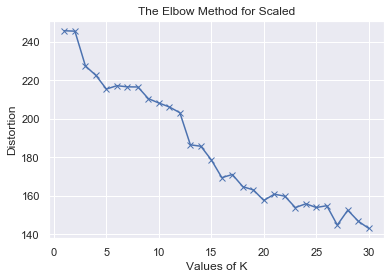

In [20]:
k_max = 30
sse = calculate_WSS(df_final_scaled.values, k_max)
plt.plot(range(1, k_max+1), sse, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method for Scaled') 
plt.show() 


In [49]:
# calculate best
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_final_scaled)
kmeans.labels_
df['km_cluster'] = pd.Series(kmeans.labels_, index=df.index)
kmeans.cluster_centers_

array([[0.68251142, 0.51194977, 0.74097136, 0.57519934, 0.14257854,
        0.58089269, 0.35091712, 0.38606496],
       [0.76783908, 0.7353014 , 0.89330082, 0.70374218, 0.19026488,
        0.13226019, 0.72246871, 0.34849161],
       [0.72259206, 0.6208941 , 0.10097364, 0.65135598, 0.17661745,
        0.13212779, 0.3334787 , 0.41832359],
       [0.64282135, 0.722471  , 0.69310272, 0.69436263, 0.23340626,
        0.16733666, 0.59553596, 0.65994183],
       [0.74824332, 0.73935401, 0.09732824, 0.70432573, 0.19557261,
        0.16294267, 0.69742844, 0.38139157],
       [0.73607308, 0.68491538, 0.71853147, 0.6857936 , 0.19352731,
        0.51752692, 0.68198077, 0.34744154],
       [0.71199717, 0.64810765, 0.50296163, 0.66379525, 0.15738924,
        0.14913022, 0.35289533, 0.37879617],
       [0.71990571, 0.64455113, 0.87299288, 0.66290839, 0.1791174 ,
        0.14137648, 0.34966096, 0.39464558],
       [0.70737971, 0.57625205, 0.15964886, 0.62916808, 0.16998953,
        0.59025205, 0.495175

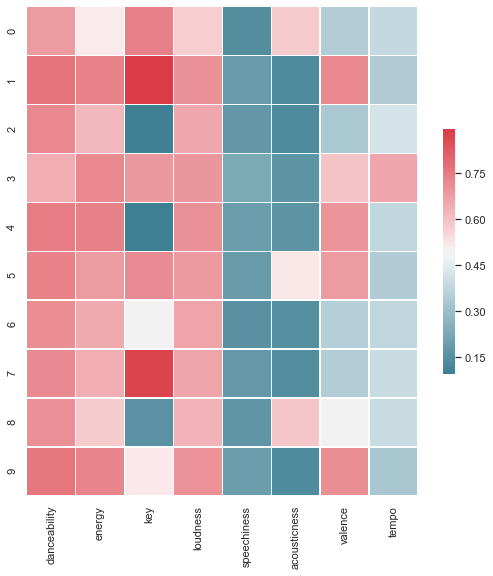

In [50]:
kmeans_cluster_df = pd.DataFrame(data=kmeans.cluster_centers_, columns=df_final.columns)

# sns.heatmap(kmeans_cluster_df)
# plt.autoscale()




f, ax = plt.subplots(figsize=(9, 9))

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(kmeans_cluster_df, 
#             mask=mask,
#             cmap=cmap, vmax=.3, center=0,
            cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.autoscale()

In [23]:
df[['lang','popularity']].groupby(['lang']).agg(['mean'])


,popularity
,mean
lang,
Arabic,28.838542
Chinese,22.061785
English,54.789528
French,44.045005
German,45.494131
Greek,23.530899
Indonesian,21.874539
Israeli,21.714286


In [24]:
# Set up the matplotlib figure
# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
# sns.despine(left=True)

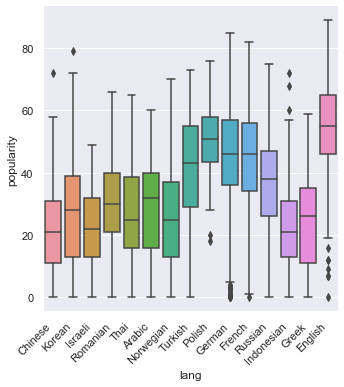

In [25]:
pchart = sns.catplot(x="lang", y="popularity", kind="box", data=df);
# pchart.set_title('Language vs. Popularity')
pchart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

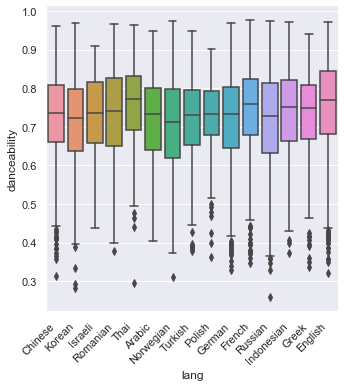

In [26]:
pchart = sns.catplot(x="lang", y="danceability", kind="box", data=df);
# pchart.set_title('Language vs. Danceability')
pchart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

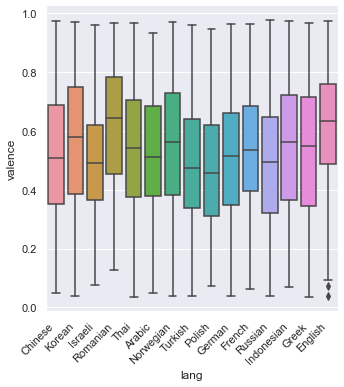

In [27]:
pchart = sns.catplot(x="lang", y="valence", kind="box", data=df);
# pchart.set_title('Language vs. Valence')
pchart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

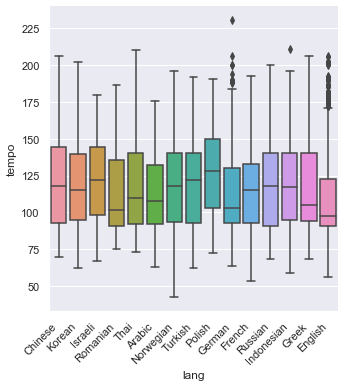

In [28]:
pchart = sns.catplot(x="lang", y="tempo", kind="box", data=df);
# pchart.set_title('Language vs. Tempo')
pchart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [29]:
df_cluster2 = df[(df['km_cluster'] == 2) & (df['lang'] == 'Arabic')]
df_cluster2.head(2)

,Unnamed: 0,id,name,popularity,uri,lang,duration_ms,time_signature,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,artist,km_cluster
1612,1612,6ceLwg0xjXNZe2WBOhMGgA,Fa9ou Biya,49,spotify:track:6ceLwg0xjXNZe2WBOhMGgA,Arabic,213906,4,0.82,0.716,...,0.365,0.340,0.00000,0.101,0.925,141.011,https://api.spotify.com/v1/tracks/6ceLwg0xjXNZ...,https://api.spotify.com/v1/audio-analysis/6ceL...,Sanfara,2
1613,1613,1Nyh4t2z67Lp7kiTDccWtu,OK BB,50,spotify:track:1Nyh4t2z67Lp7kiTDccWtu,Arabic,206054,4,0.91,0.635,...,0.158,0.169,0.00124,0.114,0.875,115.977,https://api.spotify.com/v1/tracks/1Nyh4t2z67Lp...,https://api.spotify.com/v1/audio-analysis/1Nyh...,Lbenj,2


In [30]:
df_cluster2[['name', 'lang', 'track_href']].tail(5)

,name,lang,track_href
1783,Choukran,Arabic,https://api.spotify.com/v1/tracks/1enHUv9ixGD3...
1795,طرابلس 97,Arabic,https://api.spotify.com/v1/tracks/7w2tBciRNBcg...
1801,Dose Dose,Arabic,https://api.spotify.com/v1/tracks/1RL1ecP6m8Rf...
1803,Johnnie Mashi,Arabic,https://api.spotify.com/v1/tracks/0mzCFr23f0fr...
1805,Tofla boumba,Arabic,https://api.spotify.com/v1/tracks/0aHCd8KdVIHS...


In [31]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.28, min_samples=2)
dbs.fit(df_final_scaled)

DBSCAN(algorithm='auto', eps=0.28, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [32]:
np.unique(dbs.labels_)

array([-1,  0,  1,  2,  3,  4])

In [33]:
df['dbs_cluster'] = pd.Series(dbs.labels_, index=df.index)

In [34]:
pca = PCA(n_components=3)

In [35]:
pca.fit(df_final_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pca.components_
principalComponents = pca.fit_transform(df_final_scaled)

In [37]:
principalComponents

eigenvectors = pca.components_
eigenvalues  = pca.explained_variance_


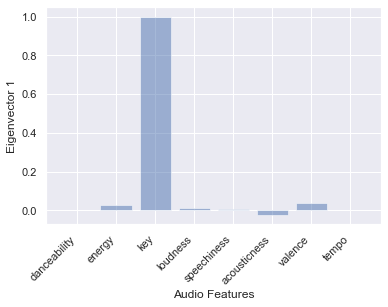

In [38]:
y_pos = np.arange(len(df_final_scaled.columns))
plt.bar(y_pos, eigenvectors[0], align='center', alpha=0.5)
plt.xticks(y_pos, df_final_scaled.columns, rotation=45, ha='right')
plt.xlabel('Audio Features')
plt.ylabel('Eigenvector 1')
plt.show()

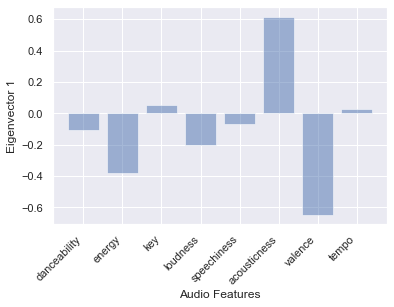

In [39]:
y_pos = np.arange(len(df_final_scaled.columns))
plt.bar(y_pos, eigenvectors[1], align='center', alpha=0.5)
plt.xticks(y_pos, df_final_scaled.columns, rotation=45, ha='right')
plt.xlabel('Audio Features')
plt.ylabel('Eigenvector 1')
plt.show()

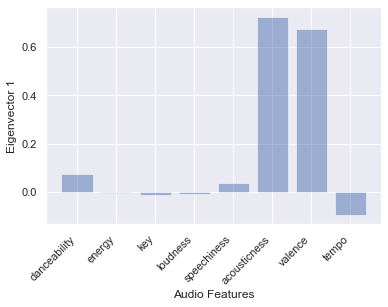

In [40]:
y_pos = np.arange(len(df_final_scaled.columns))
plt.bar(y_pos, eigenvectors[2], align='center', alpha=0.5)
plt.xticks(y_pos, df_final_scaled.columns, rotation=45, ha='right')
plt.xlabel('Audio Features')
plt.ylabel('Eigenvector 1')
plt.show()

In [41]:
len(principalComponents)

6896

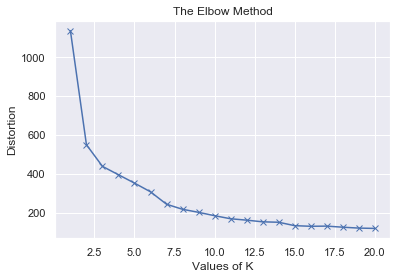

In [51]:

k_max = 20
sse = calculate_WSS(principalComponents, k_max)
plt.plot(range(1, k_max+1), sse, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method') 
plt.show() 


In [52]:
# calculate best
kmeans_pca = KMeans(n_clusters=8, random_state=0).fit(df_final_scaled)
kmeans_pca.labels_
df['km_pca_cluster'] = pd.Series(kmeans_pca.labels_, index=df.index)
kmeans_pca.cluster_centers_

array([[0.72241928, 0.62519744, 0.10083413, 0.65454671, 0.1766158 ,
        0.1324867 , 0.33930546, 0.41693396],
       [0.702223  , 0.58903787, 0.76667092, 0.62459155, 0.17188191,
        0.56838429, 0.49559705, 0.3760363 ],
       [0.70534668, 0.64826909, 0.51427921, 0.66143961, 0.16568961,
        0.14952837, 0.35868373, 0.4106972 ],
       [0.7516189 , 0.73054573, 0.52134146, 0.69920524, 0.19971728,
        0.16760444, 0.71309045, 0.36826255],
       [0.75452041, 0.73443673, 0.88181818, 0.70560018, 0.19870469,
        0.16438846, 0.72622551, 0.38489014],
       [0.74888286, 0.73760857, 0.09714286, 0.70344665, 0.19579238,
        0.17156597, 0.70141714, 0.37910624],
       [0.70608118, 0.65124118, 0.86780749, 0.66578717, 0.18124365,
        0.1386961 , 0.35860694, 0.42511251],
       [0.70111381, 0.57280577, 0.19657884, 0.62552741, 0.1644044 ,
        0.60090895, 0.48469439, 0.39626347]])

In [53]:
df.head()

,Unnamed: 0,id,name,popularity,uri,lang,duration_ms,time_signature,danceability,energy,...,instrumentalness,liveness,valence,tempo,track_href,analysis_url,artist,km_cluster,dbs_cluster,km_pca_cluster
0,0,2G9RfvqkR9SMsUdWzuKuTP,不用去猜,54,spotify:track:2G9RfvqkR9SMsUdWzuKuTP,Chinese,213231,4,0.844,0.505,...,0.000002,0.1820,0.637,129.919,https://api.spotify.com/v1/tracks/2G9RfvqkR9SM...,https://api.spotify.com/v1/audio-analysis/2G9R...,Jony J,8,0,7
1,1,7M8IGiUn2M7l5INSN4Bo9O,想把你留在这里,41,spotify:track:7M8IGiUn2M7l5INSN4Bo9O,Chinese,200359,4,0.801,0.665,...,0.000000,0.0703,0.609,95.016,https://api.spotify.com/v1/tracks/7M8IGiUn2M7l...,https://api.spotify.com/v1/audio-analysis/7M8I...,Tizzy T,1,0,4
2,2,0pQVtvG3YTqZ1cAvCtvIW4,阿司匹林,46,spotify:track:0pQVtvG3YTqZ1cAvCtvIW4,Chinese,202059,4,0.802,0.689,...,0.000000,0.1530,0.302,135.971,https://api.spotify.com/v1/tracks/0pQVtvG3YTqZ...,https://api.spotify.com/v1/audio-analysis/0pQV...,王以太,2,0,0
3,3,0FS9dl1Nr59CoXrN0n8TWX,星球墜落(FALLING),46,spotify:track:0FS9dl1Nr59CoXrN0n8TWX,Chinese,233158,4,0.498,0.536,...,0.000000,0.1070,0.386,114.036,https://api.spotify.com/v1/tracks/0FS9dl1Nr59C...,https://api.spotify.com/v1/audio-analysis/0FS9...,AIR,0,0,1
4,4,6w45ivdD1hdFq42qJaigGw,江湖流,35,spotify:track:6w45ivdD1hdFq42qJaigGw,Chinese,289091,4,0.693,0.625,...,0.000007,0.0914,0.399,176.137,https://api.spotify.com/v1/tracks/6w45ivdD1hdF...,https://api.spotify.com/v1/audio-analysis/6w45...,C-BLOCK,3,0,6


In [54]:
myplaylist_df = pd.read_csv('my_playlist.csv')

def recommend(input_song, kmeans_classifier, num_songs=10):
    # Transform the data first
    song_language = input_song['lang']
    cleaned_song = input_song[cols_final].copy()
    cleaned_song[['loudness', 'tempo', 'key']] = min_max_scaler.transform(cleaned_song[['loudness', 'tempo', 'key']])
#     print(cleaned_song)
    cluster = kmeans_classifier.predict(cleaned_song)[0]
    print(cluster)
    randomly = df[df['km_pca_cluster'] == cluster].sample(n=num_songs)
    return randomly


In [84]:
# Randomly choose 
m = myplaylist_df.iloc[[20]].copy()
print(m)
# m = df.iloc[[1]].copy()
# m.head()
myplaylist_df.head()

    Unnamed: 0                      id     name  popularity  \
20          20  27GmP9AWRs744SzKcpJsTZ  Jumpman          73   

                                     uri     lang  duration_ms  \
20  spotify:track:27GmP9AWRs744SzKcpJsTZ  English       205879   

    time_signature  danceability  energy  ...  mode  speechiness  \
20               4         0.852   0.553  ...     1        0.187   

    acousticness  instrumentalness  liveness  valence    tempo  \
20        0.0559               0.0     0.332    0.656  142.079   

                                           track_href  \
20  https://api.spotify.com/v1/tracks/27GmP9AWRs74...   

                                         analysis_url artist  
20  https://api.spotify.com/v1/audio-analysis/27Gm...  Drake  

[1 rows x 22 columns]


,Unnamed: 0,id,name,popularity,uri,lang,duration_ms,time_signature,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,artist
0,0,2KpCpk6HjXXLb7nnXoXA5O,Ni**as In Paris,61,spotify:track:2KpCpk6HjXXLb7nnXoXA5O,English,219320,4,0.757,0.882,...,1,0.248,0.076300,0.000000,0.251,0.684,140.047,https://api.spotify.com/v1/tracks/2KpCpk6HjXXL...,https://api.spotify.com/v1/audio-analysis/2KpC...,JAY-Z
1,1,7hmAf3bxD3xRGj9pShrLlT,Off Deez (with J. Cole),0,spotify:track:7hmAf3bxD3xRGj9pShrLlT,English,213358,4,0.874,0.580,...,1,0.215,0.002100,0.000000,0.110,0.434,85.500,https://api.spotify.com/v1/tracks/7hmAf3bxD3xR...,https://api.spotify.com/v1/audio-analysis/7hmA...,JID
2,2,3Dsw4eD9XcYDlioqT7ASe8,Let My Beat Pound,20,spotify:track:3Dsw4eD9XcYDlioqT7ASe8,English,212040,4,0.559,0.736,...,1,0.200,0.016900,0.000000,0.812,0.575,82.050,https://api.spotify.com/v1/tracks/3Dsw4eD9XcYD...,https://api.spotify.com/v1/audio-analysis/3Dsw...,T.I.
3,3,4Kz4RdRCceaA9VgTqBhBfa,The Motto,72,spotify:track:4Kz4RdRCceaA9VgTqBhBfa,English,181573,4,0.766,0.442,...,1,0.356,0.000107,0.000061,0.111,0.390,201.800,https://api.spotify.com/v1/tracks/4Kz4RdRCceaA...,https://api.spotify.com/v1/audio-analysis/4Kz4...,Drake
4,4,49XzscKLtLN0Th6NvnoAfj,The Time Is Now,36,spotify:track:49XzscKLtLN0Th6NvnoAfj,English,177560,4,0.551,0.915,...,1,0.219,0.037000,0.000003,0.238,0.361,173.899,https://api.spotify.com/v1/tracks/49XzscKLtLN0...,https://api.spotify.com/v1/audio-analysis/49Xz...,WWE


In [75]:
n_new_songs = 10
rec = recommend(m, kmeans_pca, num_songs=n_new_songs)
rec.head(n_new_songs)

4


,Unnamed: 0,id,name,popularity,uri,lang,duration_ms,time_signature,danceability,energy,...,instrumentalness,liveness,valence,tempo,track_href,analysis_url,artist,km_cluster,dbs_cluster,km_pca_cluster
6262,6262,6PxFmpnkuOz5iKkRCqyB8W,Creed,20,spotify:track:6PxFmpnkuOz5iKkRCqyB8W,Greek,163333,4,0.875,0.826,...,0.000362,0.1320,0.558,125.954,https://api.spotify.com/v1/tracks/6PxFmpnkuOz5...,https://api.spotify.com/v1/audio-analysis/6PxF...,BABA,1,0,4
7182,7182,0vDgtmc5vMDyE69oYnAbUm,The Creator,44,spotify:track:0vDgtmc5vMDyE69oYnAbUm,English,283813,4,0.826,0.491,...,0.072900,0.0929,0.617,115.998,https://api.spotify.com/v1/tracks/0vDgtmc5vMDy...,https://api.spotify.com/v1/audio-analysis/0vDg...,Pete Rock & C.L. Smooth,1,0,4
3586,3586,1tVhmi6ltumhZtd1pM8Tya,Traumreise,45,spotify:track:1tVhmi6ltumhZtd1pM8Tya,German,231800,4,0.677,0.633,...,0.000033,0.3340,0.583,96.064,https://api.spotify.com/v1/tracks/1tVhmi6ltumh...,https://api.spotify.com/v1/audio-analysis/1tVh...,Massive Töne,1,0,4
4142,4142,7xNTR35n3KypFMe3EHaTCb,Charisme,42,spotify:track:7xNTR35n3KypFMe3EHaTCb,French,253613,4,0.861,0.663,...,0.000000,0.0446,0.816,92.982,https://api.spotify.com/v1/tracks/7xNTR35n3Kyp...,https://api.spotify.com/v1/audio-analysis/7xNT...,Wallen,1,0,4
5675,5675,7MW9HSZfEdgjySNqV8sThE,Face Me,47,spotify:track:7MW9HSZfEdgjySNqV8sThE,Indonesian,180000,4,0.778,0.737,...,0.000494,0.2590,0.726,140.035,https://api.spotify.com/v1/tracks/7MW9HSZfEdgj...,https://api.spotify.com/v1/audio-analysis/7MW9...,QoryGore,1,0,4
3526,3526,58VJDXBKn75nzdI4DZUEqT,KIWI,59,spotify:track:58VJDXBKn75nzdI4DZUEqT,German,188354,4,0.801,0.390,...,0.000000,0.3360,0.723,105.025,https://api.spotify.com/v1/tracks/58VJDXBKn75n...,https://api.spotify.com/v1/audio-analysis/58VJ...,Riccardo,1,0,4
1677,1677,5pPbZd8gIC1evQwAll5W8z,Mi Corazón,52,spotify:track:5pPbZd8gIC1evQwAll5W8z,Arabic,180707,4,0.724,0.834,...,0.000000,0.1480,0.604,106.001,https://api.spotify.com/v1/tracks/5pPbZd8gIC1e...,https://api.spotify.com/v1/audio-analysis/5pPb...,DJ Sem,1,0,4
2093,2093,6qpMIc7B2FV6dBjaDeSL2B,H.O.V.D.E.B.Y.G.D.A.,27,spotify:track:6qpMIc7B2FV6dBjaDeSL2B,Norwegian,204000,4,0.819,0.671,...,0.000000,0.1440,0.824,160.000,https://api.spotify.com/v1/tracks/6qpMIc7B2FV6...,https://api.spotify.com/v1/audio-analysis/6qpM...,Side Brok,1,0,4
2127,2127,0BiJ6GaWV6EE5IPTugtwQI,Harley,41,spotify:track:0BiJ6GaWV6EE5IPTugtwQI,Norwegian,195652,4,0.767,0.818,...,0.000000,0.4170,0.768,91.963,https://api.spotify.com/v1/tracks/0BiJ6GaWV6EE...,https://api.spotify.com/v1/audio-analysis/0BiJ...,B-Boy Myhre,1,0,4
6871,6871,6jBCehpNMkwFVF3dz4nLIW,It's Tricky,69,spotify:track:6jBCehpNMkwFVF3dz4nLIW,English,183427,4,0.956,0.720,...,0.000000,0.0597,0.961,127.872,https://api.spotify.com/v1/tracks/6jBCehpNMkwF...,https://api.spotify.com/v1/audio-analysis/6jBC...,Run–D.M.C.,1,0,4


In [63]:
# df[df['km_pca_cluster'] != df['km_cluster']]

In [87]:
rec[['id', 'name', 'artist','lang', 'popularity', 'danceability', 'energy', 'valence', 'tempo']].to_csv('drake_jumpman_recommended.csv')

In [88]:
m[['id', 'name', 'artist','lang', 'popularity', 'danceability', 'energy', 'valence', 'tempo']].to_csv('drake_jumpman.csv')

In [86]:
rec[['id', 'name', 'artist','lang', 'popularity', 'danceability', 'energy', 'valence', 'tempo']]

,id,name,artist,lang,popularity,danceability,energy,valence,tempo
6262,6PxFmpnkuOz5iKkRCqyB8W,Creed,BABA,Greek,20,0.875,0.826,0.558,125.954
7182,0vDgtmc5vMDyE69oYnAbUm,The Creator,Pete Rock & C.L. Smooth,English,44,0.826,0.491,0.617,115.998
3586,1tVhmi6ltumhZtd1pM8Tya,Traumreise,Massive Töne,German,45,0.677,0.633,0.583,96.064
4142,7xNTR35n3KypFMe3EHaTCb,Charisme,Wallen,French,42,0.861,0.663,0.816,92.982
5675,7MW9HSZfEdgjySNqV8sThE,Face Me,QoryGore,Indonesian,47,0.778,0.737,0.726,140.035
3526,58VJDXBKn75nzdI4DZUEqT,KIWI,Riccardo,German,59,0.801,0.390,0.723,105.025
1677,5pPbZd8gIC1evQwAll5W8z,Mi Corazón,DJ Sem,Arabic,52,0.724,0.834,0.604,106.001
2093,6qpMIc7B2FV6dBjaDeSL2B,H.O.V.D.E.B.Y.G.D.A.,Side Brok,Norwegian,27,0.819,0.671,0.824,160.000
2127,0BiJ6GaWV6EE5IPTugtwQI,Harley,B-Boy Myhre,Norwegian,41,0.767,0.818,0.768,91.963
6871,6jBCehpNMkwFVF3dz4nLIW,It's Tricky,Run–D.M.C.,English,69,0.956,0.720,0.961,127.872
